# Pandas Exercise

First import pandas

In [2]:
# Import pandas
import pandas as pd


For this exercise, you will retrace another [post from the DataColada blog](https://datacolada.org/110), that looks at [this publication](https://journals.sagepub.com/doi/abs/10.1177/0956797615575277).

After being asked to express their opinion on a local campus issue at Harvard University, students were then tasked with arguing for or against their own opinion. The hypothesis was that this would increase the desire for cleansing products.

### Task 1: Import Data
- **Loading the data into pandas**. For this experiment, you will load a CSV file containing responses from the survey. This data includes demographic information and participants' ratings of cleansing products.
- **Commands to use**: Use `pd.read_csv()` to load your dataset into a pandas DataFrame. The file is located in `../Data/exercise/Gino_Kouchaki_Galinsky_Study_4_Data.csv`


In [3]:
# Load dataset into a pandas DataFrame
df = pd.read_csv('../Data/exercise/Gino_Kouchaki_Galinsky_Study_4_Data.csv')


### Task 2: Preliminary Data Inspection
- **Understand the structure**: Examine the first few rows to get an idea of the available data. Find the tables with the aggregated data: `av_products_clean` (average rating of cleansing products) and `condition`, where pro-attitudinal people agreeing with the choice they were making
- **Commands to use**: Use `df.columns` to look at the available columns, as well as `df.head()` and `df.describe().T`


In [4]:
# Generate descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,491.0,246.000000,141.883755,1.0,123.50,246.0,368.5,491.0
instr,491.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
college_student,491.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
inFavor_inclusion_diffRating_in_Qguide,491.0,0.947047,0.224168,0.0,1.00,1.0,1.0,1.0
strongOpin,491.0,5.914460,1.240809,1.0,5.00,6.0,7.0,7.0
age,491.0,20.424644,1.901510,17.0,19.00,20.0,21.0,36.0
male,491.0,0.448065,0.533425,0.0,0.00,0.0,1.0,3.0
instr_A,490.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
product_clean1,490.0,4.500000,1.840523,1.0,3.00,5.0,6.0,7.0
product_neutral1,490.0,4.463265,1.732546,1.0,3.00,5.0,6.0,7.0


### Task 3 Calculating the p-value for the original hypothesis
 - **Reproduce the originally reported significance**: Calculate the difference of averages in the desire for cleansing products between the group that did or did not argue against their conviction, as well as the p-value.
 - **Commands to use**: conditional selection, `ttest_ind` from `scipy.stats`, as well as mean and std

In [13]:
from scipy.stats import ttest_ind
# Conducting two-sample ttest
t_stat, p_value = ttest_ind(
    df.loc[df['condition'] != 'ProAttitudinal', 'av_products_clean'].dropna(),
    df.loc[df['condition'] == 'ProAttitudinal', 'av_products_clean'].dropna()
)
t_stat, p_value

(3.9321247114067943, 9.638791093383013e-05)

In [10]:
# Use 'loc' with conditions 
df.loc[df['condition'] == 'ProAttitudinal', 'av_products_clean'].mean(), df.loc[df['condition'] != 'ProAttitudinal', 'av_products_clean'].mean()

(3.721739130434783, 4.262613981762918)

### Task 4: Finding the suspect values
- **Find the suspect values within the dataset**: Assess how students have responded to the 'yearSchool' question (*What year are you in your university?*), can you spot the answer that does not make sense (*try looking at the blog*). How long are the strings?
- **Commands to use**: `df['yearSchool'].unique()`, and `df['yearSchool'].value_counts()` to display the first few rows and analyze the responses in the 'yearSchool' column.

In [15]:
df['yearSchool'].unique()

array(['senior                                            ',
       'Junior                                            ',
       'Freshman                                          ',
       'Senior                                            ',
       'Freshman (Class of 2018)                          ',
       '2nd                                               ',
       '3rd                                               ',
       'Freshman (First Year)                             ',
       '2016                                              ',
       '2015                                              ',
       'Sophomore                                         ',
       'sophomore                                         ',
       'Junior (2016)                                     ',
       '2018                                              ',
       '2017                                              ',
       '3rd year, class of 2016                           ',
       '3               


### Task 5: Data Cleaning
- **Normalize the 'yearSchool' entries**: Remove leading/trailing spaces, convert to lower case and create a binary column to flag responses that anomalously say 'Harvard'—this is suspected to be a data tampering indicator.
- **Commands to use**: Utilize the `str.strip()` attribute of a `pd.Series`, and the `str.lower()` attribute of a series to mark the suspect data


In [18]:
df['suspect'] = df['yearSchool'].str.strip().str.lower() == 'harvard'

In [19]:
df['suspect'].sum()

20


### Task 6: Descriptive Statistics
- **Basic Statistics**: Calculate the mean and standard deviation of the ratings for cleansing products for each survey condition.
- **Commands to use**: Apply `df.groupby()`, `df.mean()`, and `df.std()` to group the data by condition and calculate these statistics.


In [20]:
df['argued_conviction'] = df['condition'] == 'ProAttitudinal'
# Group the data by condition and calculate the statistics
df.groupby(['argued_conviction', 'suspect'])['av_products_clean'].mean()

argued_conviction  suspect
False              False      4.140952
                   True       7.000000
True               False      3.771613
                   True       2.433333
Name: av_products_clean, dtype: float64


### Task 7: Visualization
- **Plot the average ratings of cleansing products**: Distinguish between 'Harvard' and non-'Harvard' responses, to visualize potential impacts of the suspected tampered data.
- **Commands to use**: Configure `plt.subplots()`, `ax.hist()`, and `plt.show()` to create histogram plots for the different categories.


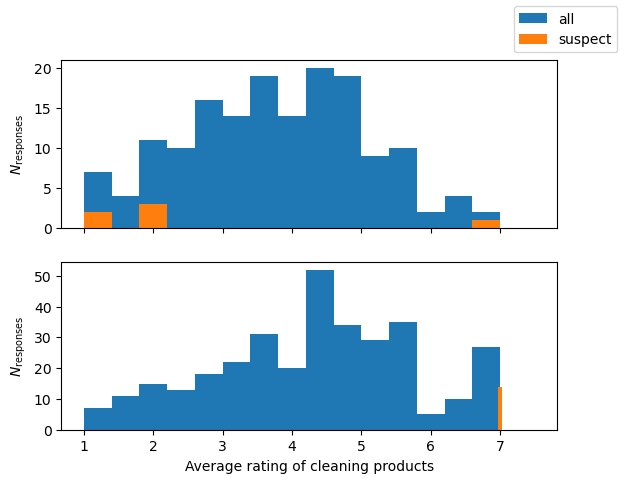

In [60]:
# Import matplotlib and Numpy
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and subplots
fig, axes = plt.subplots(2, sharex=True)

# Plot the data
axes[0].hist(df.loc[df['argued_conviction'], 'av_products_clean'], bins=15, label='all')
axes[0].hist(df.loc[np.logical_and(df['argued_conviction'], df['suspect']), 'av_products_clean'], bins=15, label='suspect')
axes[0].set_ylabel(r'$N_{\mathrm{responses}}$')
axes[1].hist(df.loc[np.logical_not(df['argued_conviction']), 'av_products_clean'], bins=15)
axes[1].hist(df.loc[np.logical_and(np.logical_not(df['argued_conviction']), df['suspect']), 'av_products_clean'], bins=15)
axes[1].set_ylabel(r'$N_{\mathrm{responses}}$')
axes[1].set_xlabel(r'Average rating of cleaning products')
fig.legend()

# Show the plot
plt.show()


### Task 8: Statistical Testing
- **Conduct a t-test**: To confirm the authors' hypothesis that arguing against one’s own side increases the desire for cleansing products—and to check if the 'Harvard' data points influence this result.
- **Commands to use**: Implement `scipy.stats.ttest_ind()` to perform the independent t-tests between groups.


In [62]:
non_suspect_for = df.loc[
    np.logical_and(
        df['argued_conviction'],
        np.logical_not(df['suspect'])
    ), 'av_products_clean']
non_suspect_against = df.loc[np.logical_and(
    np.logical_not(df['argued_conviction']),
    np.logical_not(df['suspect'])
), 'av_products_clean']

In [71]:
suspect_for = df.loc[np.logical_and(df['argued_conviction'], df['suspect']), 'av_products_clean']
suspect_against = df.loc[np.logical_and(
    np.logical_not(df['argued_conviction']),
    df['suspect']
), 'av_products_clean']

In [72]:
# Perform the independent t-tests between groups
ttest_ind(non_suspect_against.dropna(), non_suspect_for.dropna())

TtestResult(statistic=2.7890358466109735, pvalue=0.005502062228161376, df=468.0)

In [73]:
non_suspect_for.mean(), non_suspect_against.mean()

(3.771612903225806, 4.140952380952381)

In [75]:
# Perform the independent t-tests between groups
ttest_ind(suspect_against.dropna(), suspect_for.dropna())

TtestResult(statistic=7.842556707395404, pvalue=3.2488204162770613e-07, df=18.0)